In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#读取实验数据,X增加一列1
def get_data(file):
    data = load_svmlight_file(file)
    b = np.ones(data[0].toarray().shape[0])
    X = np.column_stack((data[0].toarray(), b))
    return X, data[1]

In [3]:
#线性回归和梯度下降
def runLinearRegression(file):
    #读取实验数据
    X,y = get_data(file)
    #将数据集切分为训练集和验证集
    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
    rate = 0.001
    #n代表数据量，d代表属性维度
    length=X.shape[1]
    #线性模型参数初始化--标准正态分布初始化w，w是d维向量
    w = [np.random.normal() for i in range(length)]
    #x代表一个d维的数据，即一个向量，h(x)返回向量点积结果
    def h(x):
        return np.dot(w,x);

    Jvalid=[]
    Jtrain=[]
    #迭代n次
    #选择Loss函数及对其求导
    for i in range(30):
        # sum是维度是d的向量，保存n个x的梯度之和
        sum = 0
        for x, y in zip(x_train, y_train):
            sum = sum + rate * (y - h(x)) * x
        w = w + sum

        #计算所有的hxi,保存在一个数组
        array_hxi=np.array([h(xi) for xi in x_valid])
        # 计算所有的yi,保存在在一个数组
        array_yi=np.array([yi for yi in y_valid])
        #计算所有的hxi-yi,保存一个数组
        array_d=array_hxi-array_yi
        #计算所有的(hxi-yi)的平方,保存在一个数组
        array_d2=array_d*array_d
        #求array_d2得元素个数
        m_valid=array_d2.size
        #得到第i次迭代的loss，将所有的(hxi-yi)的平方的数组的元素相加,然后*（1/2m）
        loss_i1=0.5*(1.0/m_valid)*np.sum(array_d2)
        Jvalid.append(loss_i1)

        array_hxi = np.array([h(xi) for xi in x_train])
        array_yi = np.array([yi for yi in y_train])
        array_d = array_hxi - array_yi
        array_d2 = array_d * array_d
        m_train = array_d2.size
        loss_i2 = 0.5 * (1.0 / m_train) * np.sum(array_d2)
        Jtrain.append(loss_i2)

    #print(Jvalid[-1])
    plt.plot(Jvalid, label='Lvalidation')
    plt.plot(Jtrain,label='Ltrain')
    plt.legend()
    plt.show()

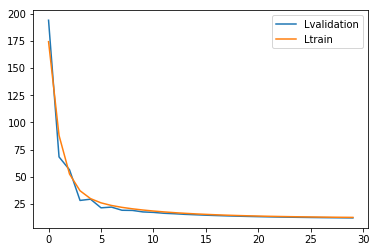

In [4]:
 runLinearRegression("C:\workspace\DeepLearningTest\data\housing_scale.txt")